<a href="https://colab.research.google.com/github/kauefs/climate/blob/%40/notebooks/CampinasSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
[![GitHub](https://img.shields.io/badge/GitHub-000000?logo=github&logoColor=white)](https://github.com/kauefs/)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?logo=linkedin&logoColor=white)](https://www.linkedin.com/in/kauefs/)
[![Python](https://img.shields.io/badge/Python-3-blue.svg)](https://www.python.org/)
[![License](https://img.shields.io/badge/License-Apache_2.0-black.svg)](https://www.apache.org/licenses/LICENSE-2.0)

# In Search of a Warming!

<center>23 November 2023</center>

## Introduction

After observing a climate series from 1998 to 2014 for the city of Campinas**/**SP, from data from [CIIAGRO](http://ciiagro.sp.gov.br/), from where minimum, mean, and maximum temperatures as well as precipitation, in milliliters **(**mm**)** has been extracted, it is hard to see, from the data, any temperature anomaly. Minimum and maximum temperatures have been stable, with close mean and median, resulting, as consequence, in a small standard deviation, which is further confirmed by the small distance among the quantiles, thus, confirming no notable change in temperatures in the region during the analyzed period.

## Data Treatment

The data set had very little missing values related to precipitation in some months. To keep the best integrality possible, this values were replaced by zero in order to not loose any temperature data.

## Question

Therefore, one may wonder where is all that global warming claimed by everyone, everywhere, because it does not show in the data**!**

In [1]:
# Libraries:
import    numpy          as np
import    pandas         as pd
import    seaborn        as sns
import matplotlib.pyplot as plt
# Data:
data  = 'https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv'
df    =  pd.read_csv(data, index_col='data', parse_dates=True)
# View:
pd.set_option('display.max.columns', None)
df#.head()

casos-confirmados  chuva  temperatura-media  temperatura-mininima  \
data                                                                            
1998-01-01                237  179.2               25.7                  20.2   
1998-02-01                331  226.3               25.1                  20.0   
1998-03-01                562  149.1               24.8                  22.4   
1998-04-01                187   46.4               22.7                  18.1   
1998-05-01                 32   88.3               19.2                  15.7   
...                       ...    ...                ...                   ...   
2014-08-01                 55   12.2               20.6                  13.1   
2014-09-01                 40   69.2               23.0                  18.6   
2014-10-01                 40   15.6               24.7                  17.2   
2014-11-01                 57  154.8               25.0                  22.1   
2014-12-01                 37  232.8               24.9                  21.3   

            temperatura-maxima  
data                            
1998-01-01                28.1  
1998-02-01                28.0  
1998-03-01                27.2  
1998-04-01                26.0  
1998-05-01                22.9  
...                        ...  
2014-08-01                24.7  
2014-09-01                26.8  
2014-10-01                30.0  
2014-11-01                28.3  
2014-12-01                27.8  

[204 rows x 5 columns]

In [2]:
# Rename Columns:
rename = {'temperatura-mininima': 'MinTemp',
          'temperatura-media'   :'MeanTemp',
          'temperatura-maxima'  : 'MaxTemp',
          'chuva'               : 'Rain'   ,
          'casos-confirmados'    : 'Cases'  }
df.rename(columns=rename, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1998-01-01 to 2014-12-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cases     204 non-null    int64  
 1   Rain      196 non-null    float64
 2   MeanTemp  204 non-null    float64
 3   MinTemp   204 non-null    float64
 4   MaxTemp   204 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.6 KB


In [3]:
# Verifying:
df

Cases   Rain  MeanTemp  MinTemp  MaxTemp
data                                                
1998-01-01    237  179.2      25.7     20.2     28.1
1998-02-01    331  226.3      25.1     20.0     28.0
1998-03-01    562  149.1      24.8     22.4     27.2
1998-04-01    187   46.4      22.7     18.1     26.0
1998-05-01     32   88.3      19.2     15.7     22.9
...           ...    ...       ...      ...      ...
2014-08-01     55   12.2      20.6     13.1     24.7
2014-09-01     40   69.2      23.0     18.6     26.8
2014-10-01     40   15.6      24.7     17.2     30.0
2014-11-01     57  154.8      25.0     22.1     28.3
2014-12-01     37  232.8      24.9     21.3     27.8

[204 rows x 5 columns]

In [4]:
# Verifying Missing Values:
df['Rain'].unique()

array([179.2, 226.3, 149.1,  46.4,  88.3,  21.2,   7.9,  15.6,  88.1,
       167.3,  55.4, 309.1, 420.3, 228.1, 140.5,  48.9,  47.1,  70.1,
         nan,  64.3,  36.6,  87.3, 176.5, 293.8, 251.7, 132.6,   0.8,
         3.2,   4.9,  83. ,  67.4,  76.9,  60.3, 276.7, 216.7, 167.7,
       316.9, 114.1,  26.8,  89.9,  20.2,  11.4,  27.5,  72.2, 251.9,
       104.4, 203.3, 219.9, 126.3, 117.1,  21.9,  96.8,   5.3,  66.4,
        49.1,  45.2, 232.4, 162.6, 385.4, 215.3,  83.9,  62.3,  49.3,
        11.5,  22.1,  19.7,  20.5,  86. , 223.3, 299.5, 176.2, 156.3,
        64.1,  47.6, 115.9,  58.5,  93.7, 201. , 117.4, 177.5, 452.8,
        96.7, 308.1,  43.1, 163.1,  44.1,   6.1,  16.2, 203.1,  38.7,
       138.4, 239.4, 184.7,  27.2,  19.8,  33.8,  12.9,  67.6,  56.5,
       229.2, 404.1, 192.1,  97. ,  63.5,  34.7, 176.4,   7.5, 100.4,
       169.6, 144.4, 188. , 233.7, 179.4, 147.5,  51. ,  59.9,  65.4,
        37.5, 107.1,  93. , 189. , 215.5, 183.6,  63.2,  37.1,  36.4,
        60.5,  80.3,

In [5]:
# Verifying Missing Values:
(df.isnull().sum()).sort_values(ascending=False)

Rain        8
Cases       0
MeanTemp    0
MinTemp     0
MaxTemp     0
dtype: int64

In [6]:
# Viewing Missing Values:
df.loc[df['Rain'].isnull()]

Cases  Rain  MeanTemp  MinTemp  MaxTemp
data                                               
1999-07-01      1   NaN      19.6     17.1     22.1
1999-08-01      3   NaN      19.8     10.8     24.8
2002-06-01     50   NaN      20.9     18.7     22.9
2004-08-01      0   NaN      19.9     14.7     23.8
2007-08-01     17   NaN      20.8     18.0     23.5
2008-07-01      8   NaN      19.2     17.1     22.6
2010-08-01     10   NaN      19.6     13.5     24.3
2012-08-01     12   NaN      20.3     17.5     21.6

In [7]:
# Cleaning Missing Values by Replacing them with Zero:
df_clean = df.fillna({'Rain':    0.00})
df_clean['Rain'].isnull().values.any()

False

In [8]:
# Summary Statistics:
df_clean.describe()

Cases        Rain    MeanTemp     MinTemp     MaxTemp
count    204.000000  204.000000  204.000000  204.000000  204.000000
mean     357.539216  112.075490   22.200980   17.679412   25.565196
std     1741.814759   97.390439    2.399363    3.336316    2.249864
min        0.000000    0.000000   16.400000    8.200000   19.100000
25%        6.000000   36.975000   20.100000   15.075000   23.800000
50%       17.500000   83.450000   22.700000   18.150000   26.200000
75%       84.500000  176.425000   24.225000   20.400000   27.200000
max    20428.000000  452.800000   27.200000   23.500000   30.100000

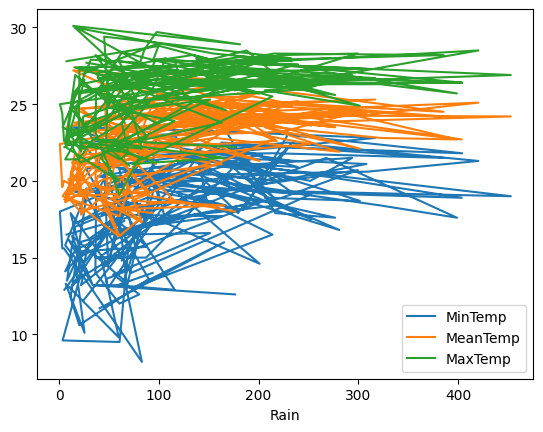

In [9]:
# https://realpython.com/pandas-plot-python/
df.plot(x='Rain', y=['MinTemp', 'MeanTemp', 'MaxTemp'])
plt.show()

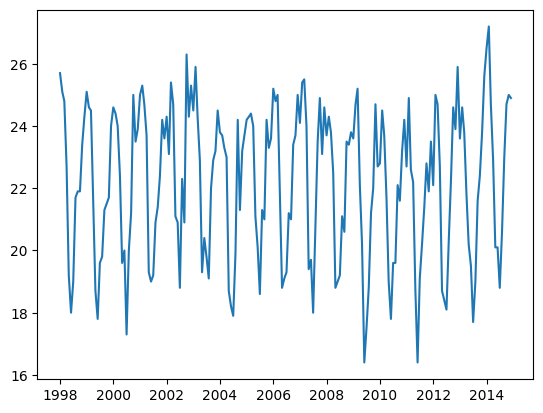

In [10]:
plt.plot(df.index, df['MeanTemp']);

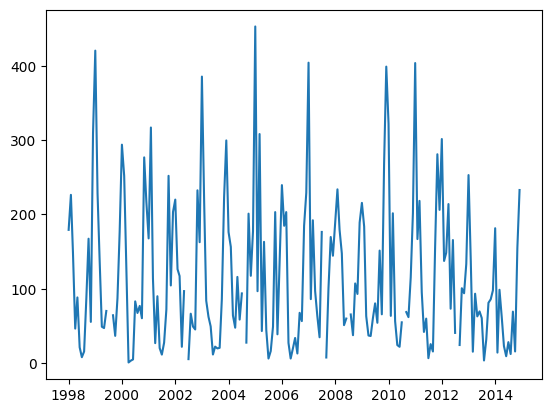

In [11]:
# Better Way:
plt.plot(df.index, df.Rain);

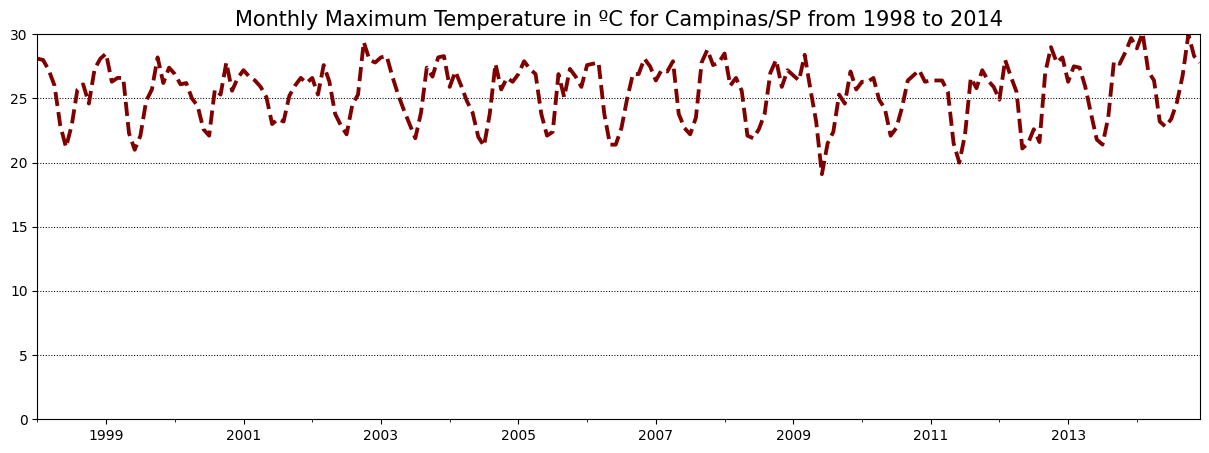

In [12]:
# Plotting Maximum Temperature:
fig, ax = plt.subplots(figsize=(15, 5))
df_clean['MaxTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dashed',
                            color='maroon')
font = {'family':'sans-serif', 'color':'black', 'size':15}
ax.set_title('Monthly Maximum Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.grid(axis='y', ls=':', lw=.75, c='k')
plt.ylim(0, 30)
plt.show()

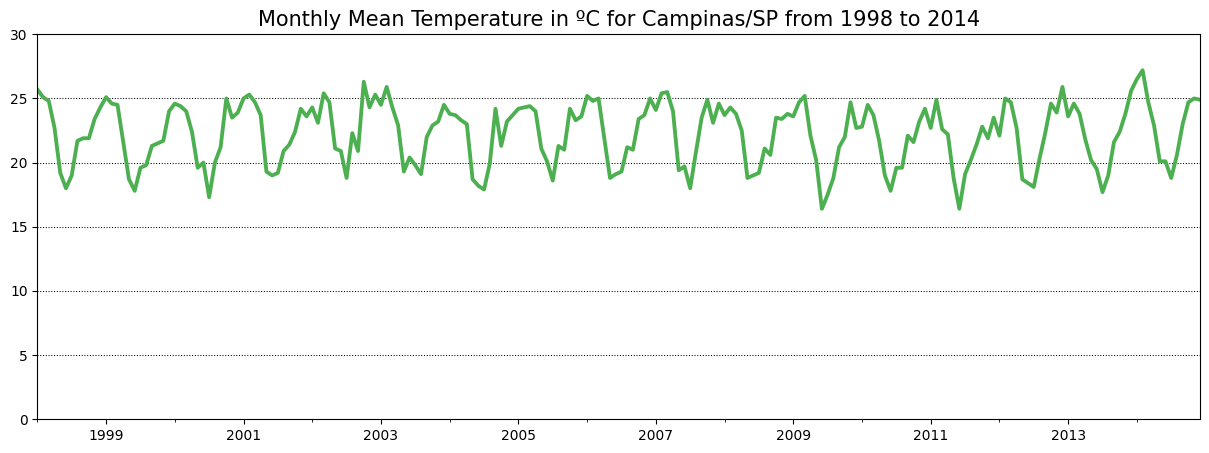

In [13]:
# Plotting Mean Temperature:
fig, ax = plt.subplots(figsize=(15, 5))
df_clean['MeanTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
font = {'family':'sans-serif', 'color':'black', 'size':15}
ax.set_title('Monthly Mean Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.grid(axis='y', ls=':', lw=.75, c='k')
plt.ylim(0, 30)
plt.show()

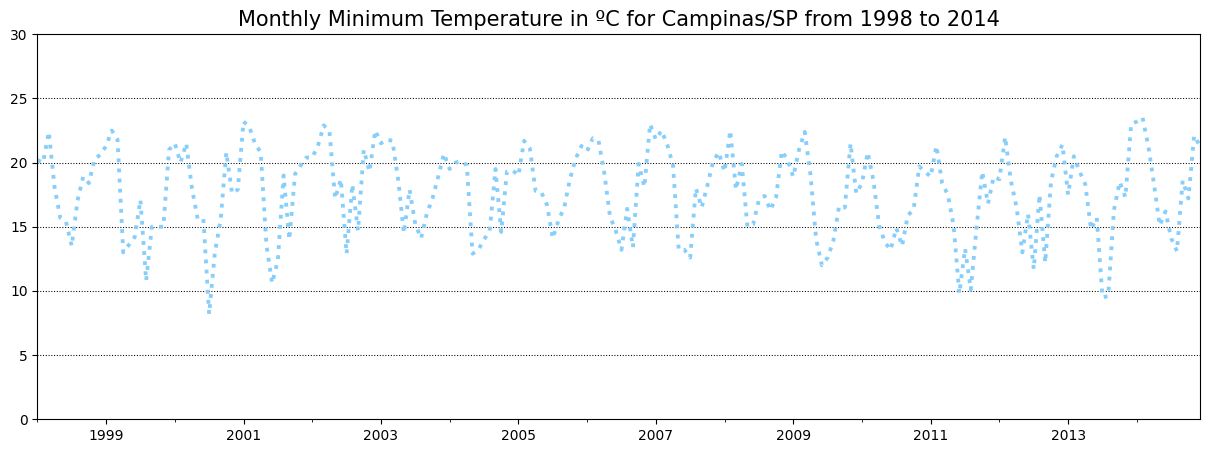

In [14]:
# Plotting Minimum Temperature:
fig,ax = plt.subplots(figsize=(15, 5))
df_clean['MinTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dotted',
                            color='LightSkyBlue')
font = {'family':'sans-serif', 'color':'black', 'size':15}
ax.set_title('Monthly Minimum Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.grid(axis='y', ls=':', lw=.75, c='k')
plt.ylim(0, 30)
plt.show()

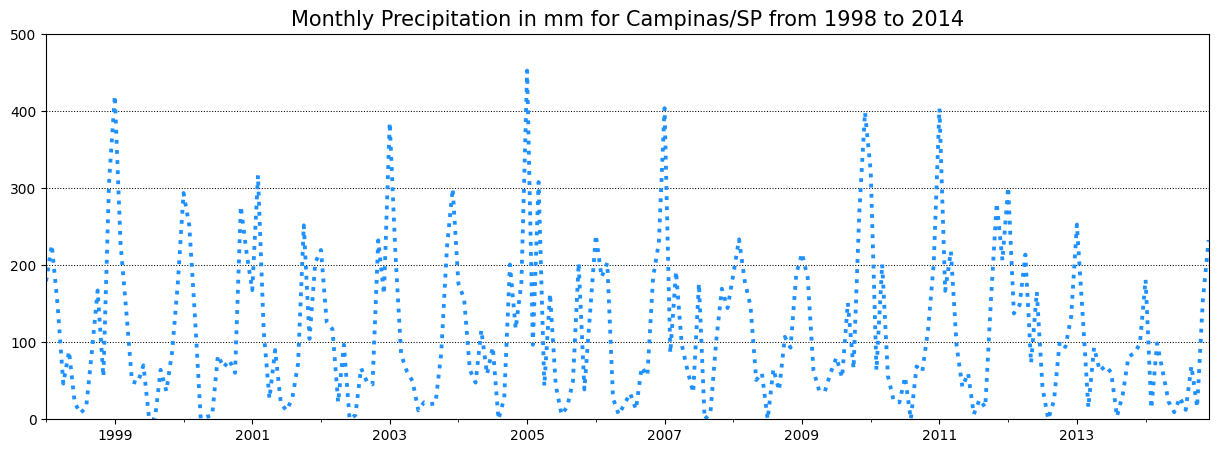

In [15]:
# Plotting Rain:
fig,ax = plt.subplots(figsize=(15, 5))
df_clean['Rain'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dotted',
                            color='DodgerBlue')
font = {'family':'sans-serif', 'color':'black', 'size':15}
ax.set_title('Monthly Precipitation in mm for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.grid(axis='y', ls=':', lw=.75, c='k')
plt.ylim(0, 500)
plt.show()

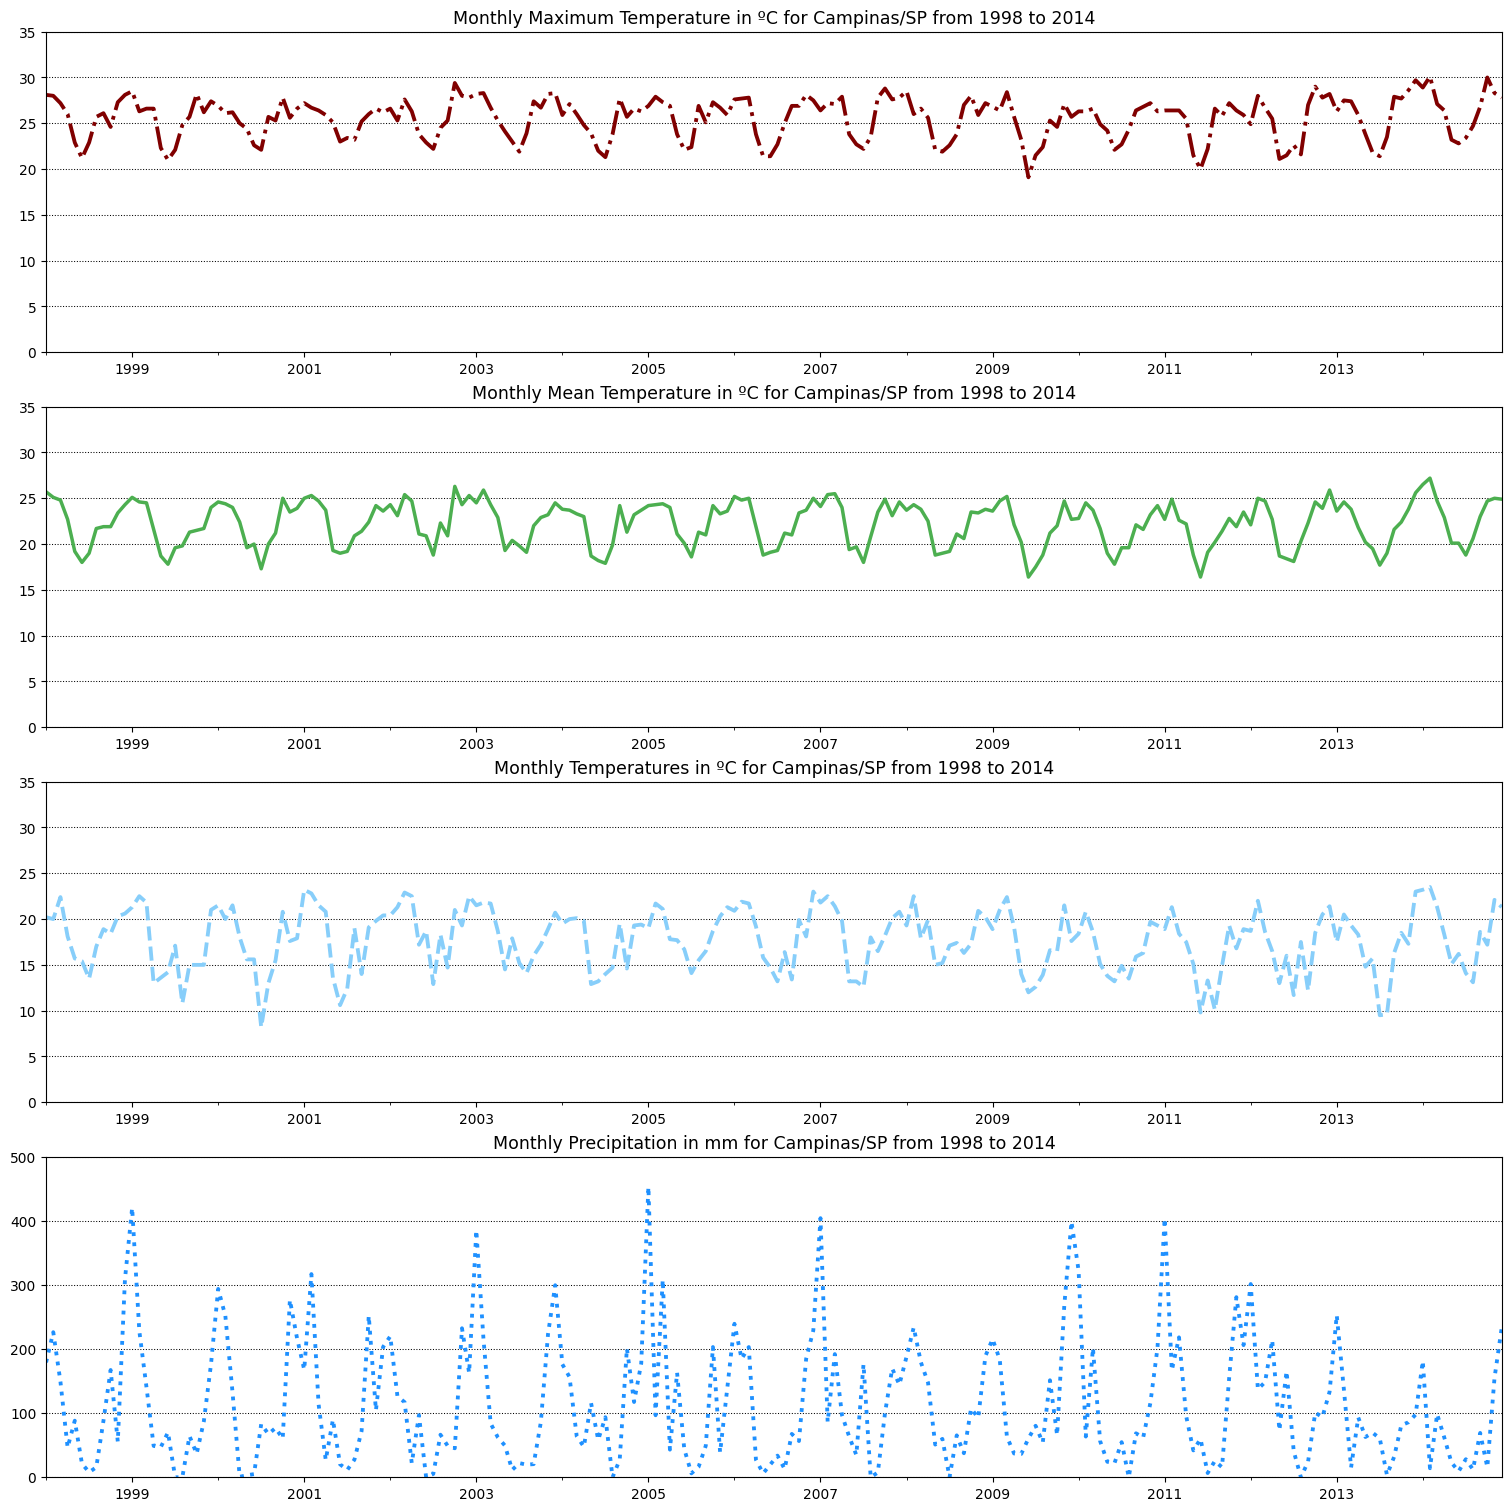

In [16]:
# Togheter:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')
ax[0].set_title('Monthly Maximum Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[0].grid(axis='y', ls=':', lw=.75, c='k')
ax[0].set_xlabel(None)
ax[0].set_ylim(0,  35)
# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax[1],
                            linewidth=2.5,
                            linestyle='solid',
                            color='#4CAF50')
ax[1].set_title('Monthly Mean Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[1].grid(axis='y', ls=':', lw=.75, c='k')
ax[1].set_xlabel(None)
ax[1].set_ylim(0,  35)
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax[2],
                            linewidth=2.75,
                            linestyle='dashed',
                            color='LightSkyBlue')
ax[2].set_title('Monthly Temperatures in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[2].grid(axis='y', ls=':', lw=.75, c='k')
ax[2].set_xlabel(None)
ax[2].set_ylim(0,  35)
# Rain:
df_clean['Rain'].plot(kind='line', ax=ax[3],
                            linewidth=2.75,
                            linestyle='dotted',
                            color='DodgerBlue')
ax[3].set_title('Monthly Precipitation in mm for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[3].grid(axis='y', ls=':', lw=.75, c='k')
ax[3].set_xlabel(None)
ax[3].set_ylim(0, 500)
plt.show()

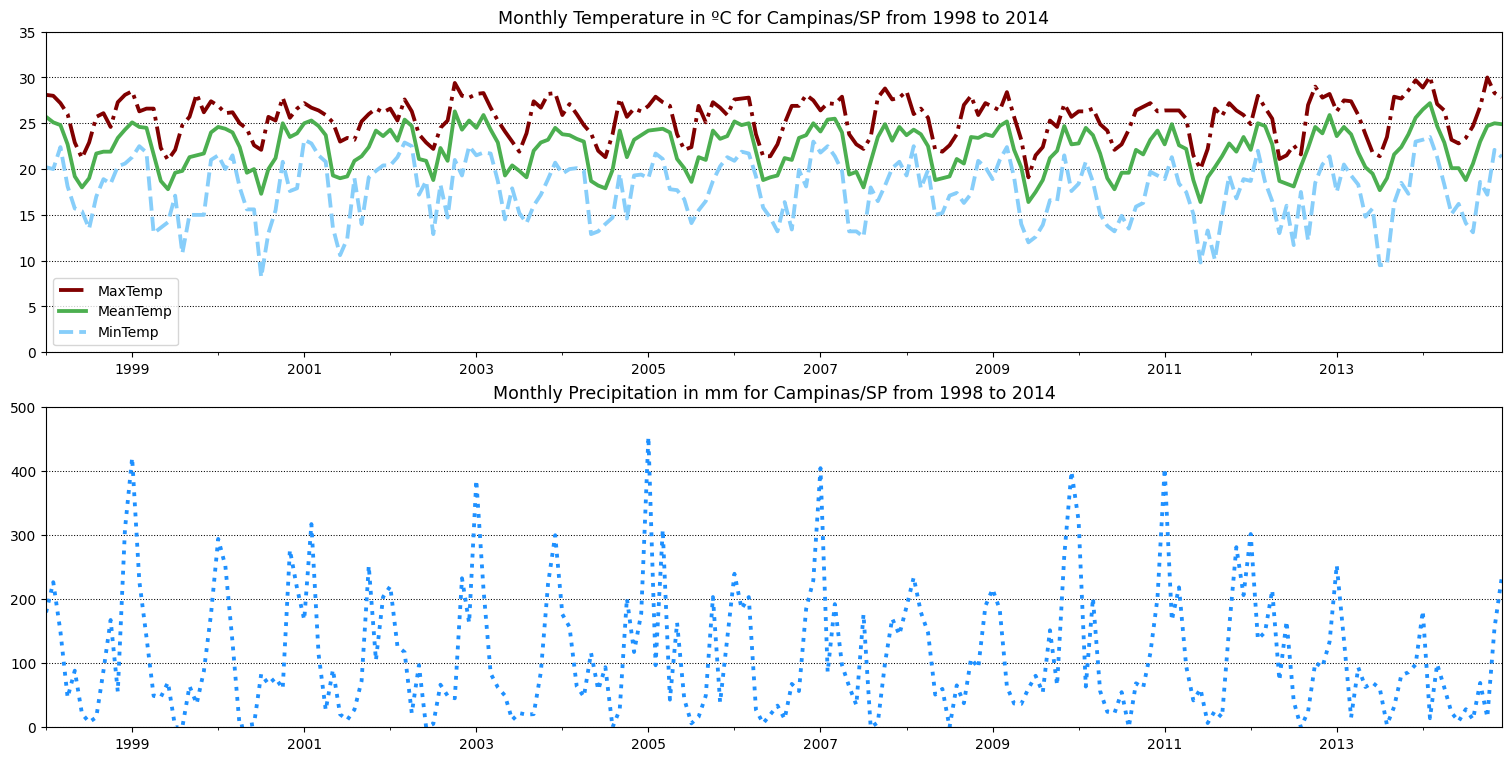

In [17]:
# Altogheter:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 7.5), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')
# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashed',
                            color='LightSkyBlue')
ax[0].set_title('Monthly Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[0].grid(axis='y', ls=':', lw=0.75, c='k')
ax[0].set_xlabel(None)
ax[0].set_ylim(0,  35)
ax[0].legend()
# Rain:
df_clean['Rain'].plot(kind='line', ax=ax[1],
                            linewidth=2.75,
                            linestyle='dotted',
                            color='DodgerBlue')
ax[1].set_title('Monthly Precipitation in mm for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[1].grid(axis='y', ls=':', lw=.75, c='k')
ax[1].set_xlabel(None)
ax[1].set_ylim(0, 500)
plt.show()

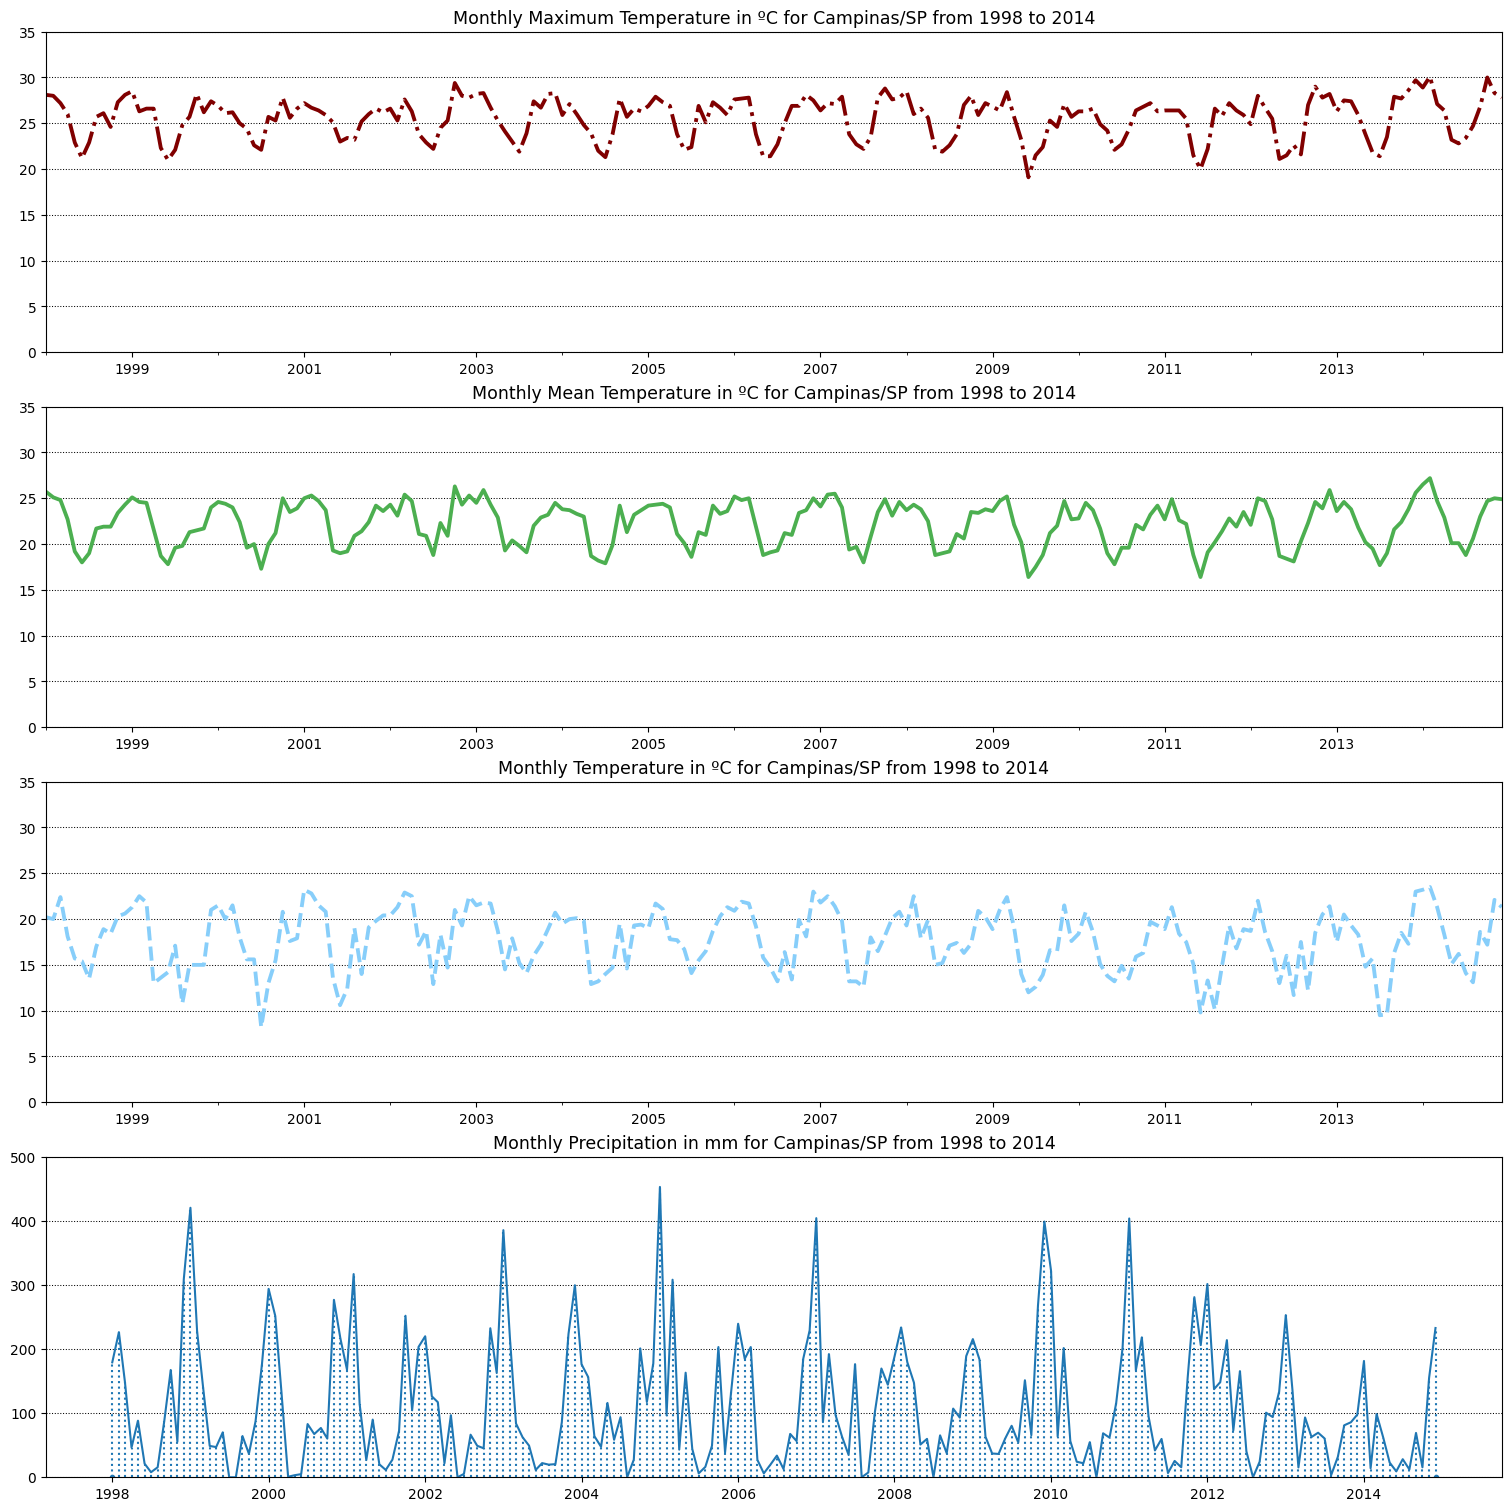

In [18]:
# Togheter with Stem:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')
ax[0].set_title('Monthly Maximum Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[0].grid(axis='y', ls=':', lw=.75, c='k')
ax[0].set_xlabel(None)
ax[0].set_ylim(0,35)
# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax[1],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
ax[1].set_title('Monthly Mean Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[1].grid(axis='y', ls=':', lw=.75, c='k')
ax[1].set_xlabel(None)
ax[1].set_ylim(0,  35)
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax[2],
                            linewidth=2.75,
                            linestyle='dashed',
                            color='LightSkyBlue')
ax[2].set_title('Monthly Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[2].grid(axis='y', ls=':', lw=.75, c='k')
ax[2].set_xlabel(None)
ax[2].set_ylim(0,  35)
# Rain:
ax[3].stem(df_clean.index, df_clean.Rain,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[3].set_title('Monthly Precipitation in mm for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[3].grid(axis='y', ls=':', lw=.75, c='k')
ax[3].set_xlabel(None)
ax[3].set_ylim(0, 500)
plt.show()

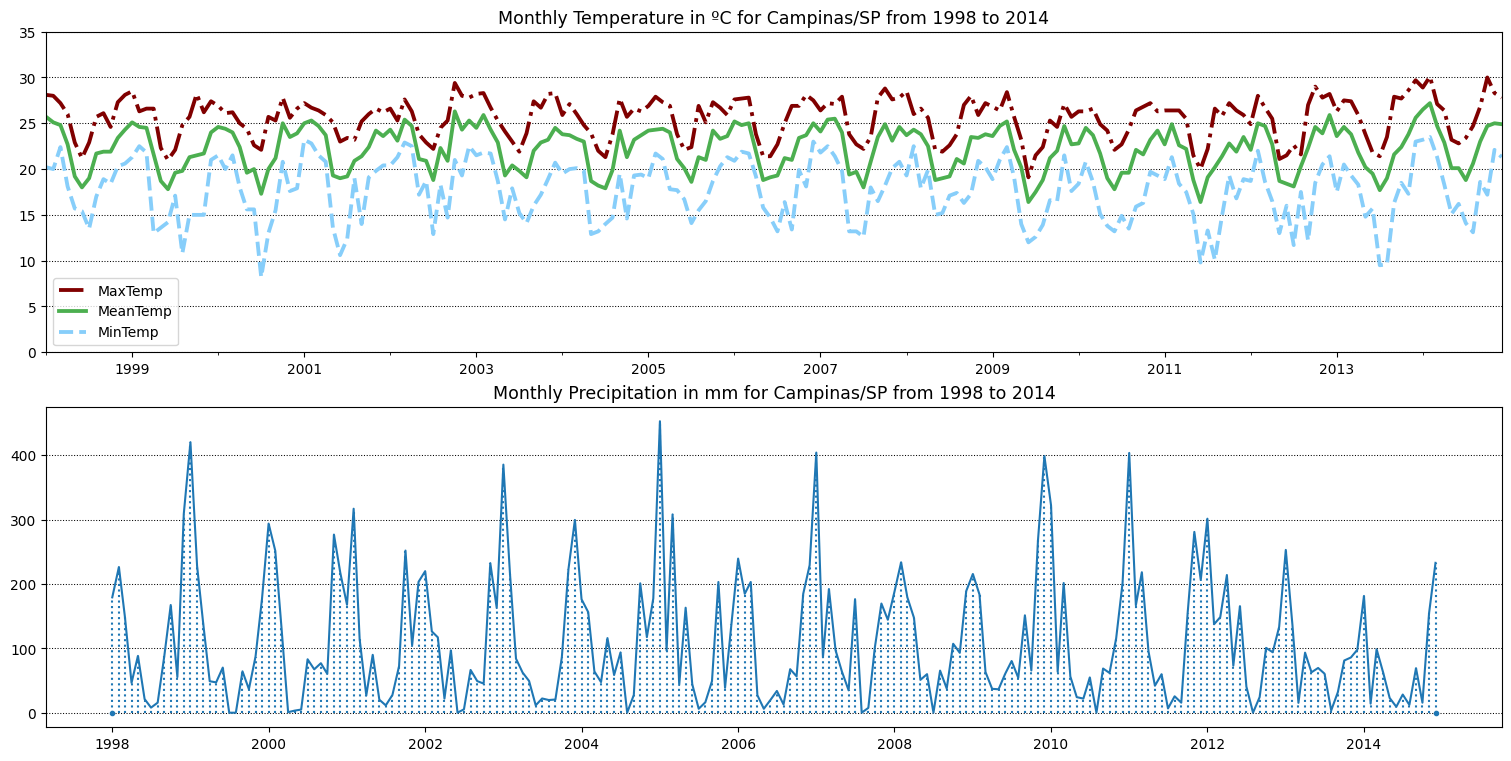

In [19]:
# Togheter with Stem:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 7.5), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')
# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashed',
                            color='LightSkyBlue')
ax[0].set_title('Monthly Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[0].grid(axis='y', ls=':', lw=.75, c='k')
ax[0].set_xlabel(None)
ax[0].set_ylim(0,  35)
ax[0].legend()
# Rain:
ax[1].stem(df_clean.index, df_clean.Rain,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[1].set_title('Monthly Precipitation in mm for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[1].grid(axis='y', ls=':', lw=.75, c='k')
plt.show()

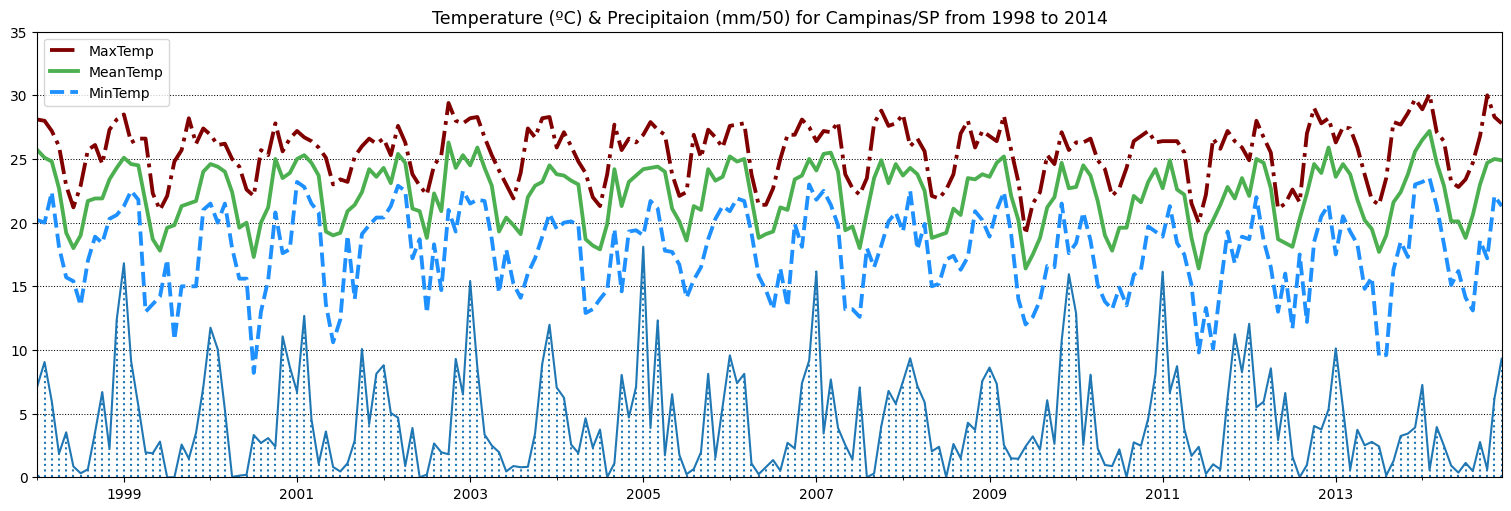

In [20]:
# Altogheter with Stem:
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')
# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dashed',
                            color='DodgerBlue')
# Rain:
plt.stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax.set_title('Temperature (ºC) & Precipitaion (mm/50) for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax.set_xlabel(None)
#ax.legend()
plt.grid(axis='y', ls=':', lw=.75, c='k')
plt.ylim(0, 35)
plt.legend()
plt.show()

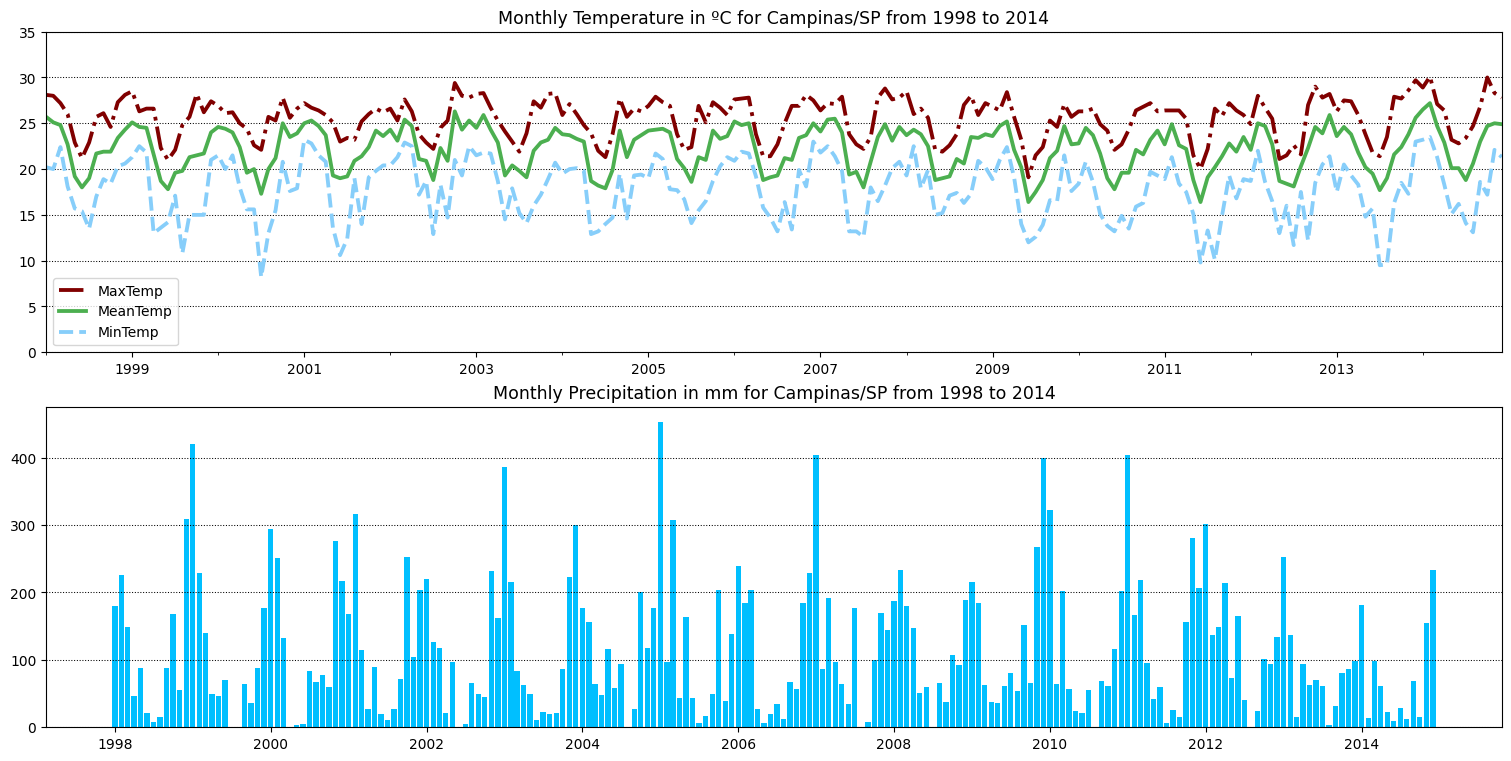

In [21]:
# Togheter with Bar:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 7.5), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')

# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dashed',
                            color='LightSkyBlue')
ax[0].set_title('Monthly Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[0].grid(axis='y', ls=':', lw=.75, c='k')
ax[0].set_xlabel(None)
ax[0].set_ylim(0,  35)
ax[0].legend()
# Rain:
ax[1].bar(df_clean.index, df_clean.Rain,
                            color='DeepSkyBlue',
                            width=25)
ax[1].set_title('Monthly Precipitation in mm for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc='center')
ax[1].grid(axis='y', ls=':', lw=.75, c='k')
plt.show()

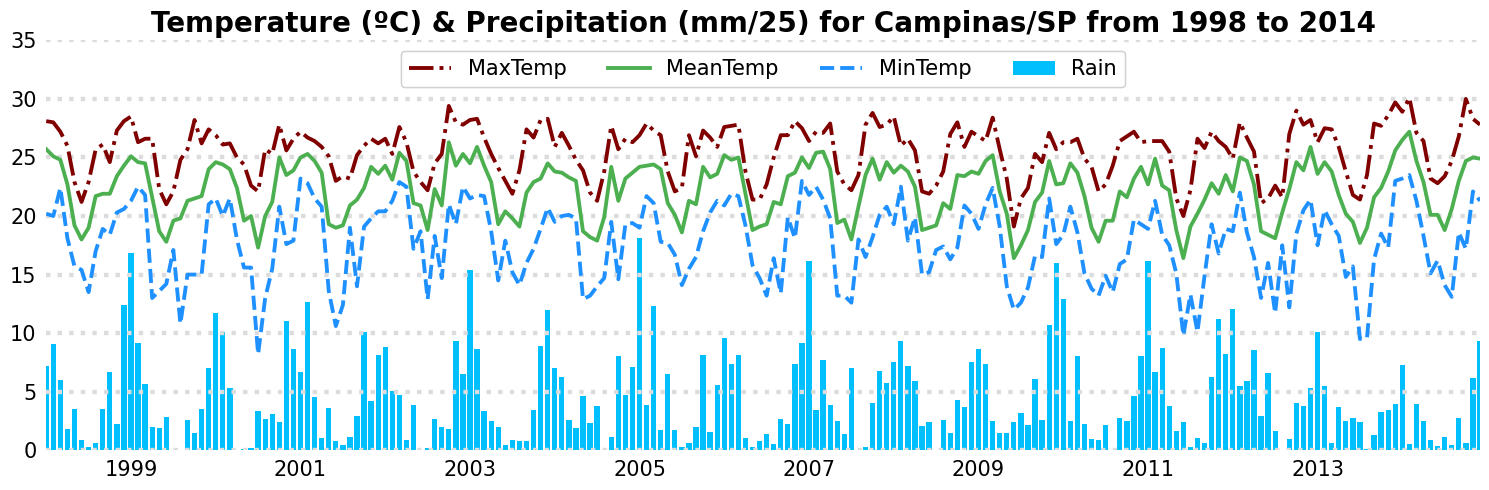

In [22]:
# Altogheter with Bar:
fig, ax = plt.subplots(figsize=(15, 5), tight_layout=True)
plt.rcParams['font.family']='sans-serif'
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')    #FF4500
# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dashed',
                            color='DodgerBlue')
# Rain:
plt.bar(df_clean.index, df_clean.Rain/25,
                            color='DeepSkyBlue',
                            width=.75)
ax.set_title('Temperature (ºC) & Precipitation (mm/25) for Campinas/SP from 1998 to 2014',
                            fontsize=20, fontweight='semibold', loc='center')
ax.set_xlabel(None)
for spine in ['top', 'right', 'left', 'bottom']:ax.spines[spine].set_visible(False)
ax.tick_params(axis   =    'both',
               which  =    'both',
               left   =     False,
               bottom =     False)
plt.grid(axis='y', linestyle=':', linewidth=3.15, color='#DCDCDC')
plt.ylim(0, 35)
leg = plt.legend(['MaxTemp', 'MeanTemp', 'MinTemp', 'Rain'], loc='upper center', ncol=4, fontsize=15)
plt.gca().add_artist(leg)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

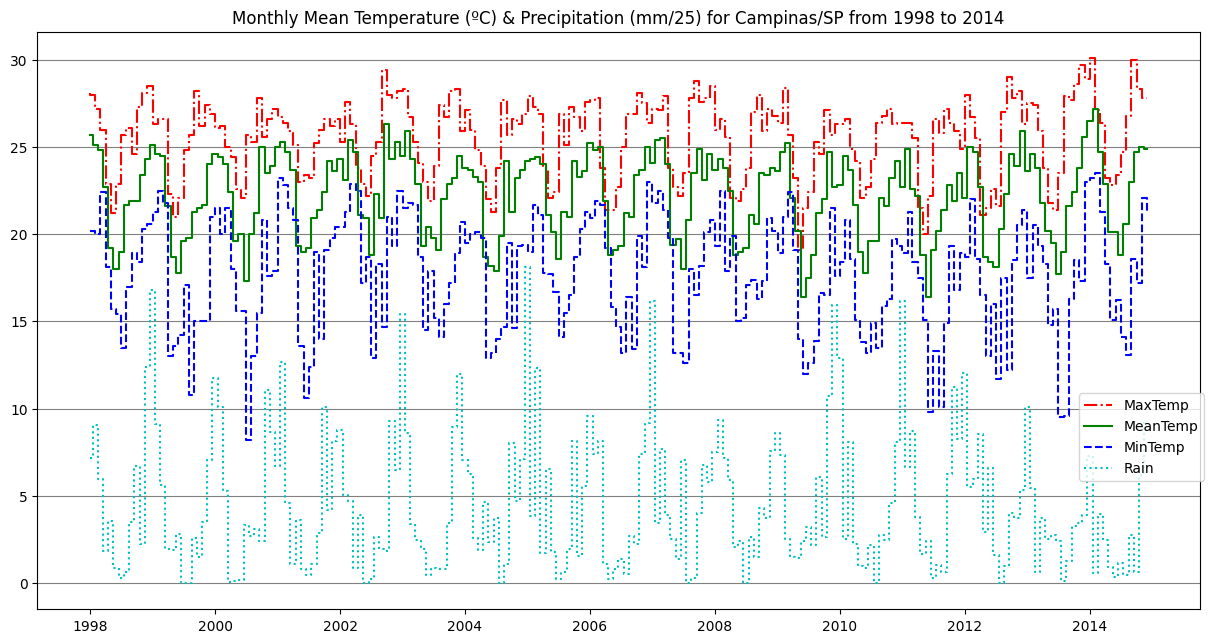

In [23]:
# @title Steps Plot
fig = plt.figure(linewidth=1, figsize=(15, 7.5))
ax = plt.gca()
ax.plot(df_clean.index, df_clean['MaxTemp'],  'r-.', label='MaxTemp' , drawstyle='steps-pre' )
ax.plot(df_clean.index, df_clean['MeanTemp'], 'g-' , label='MeanTemp', drawstyle='steps-mid' )
ax.plot(df_clean.index, df_clean['MinTemp'],  'b--', label='MinTemp' , drawstyle='steps-post')
ax.plot(df_clean.index, df_clean['Rain']/25,  'c:' , label='Rain'    , drawstyle='steps-mid' )
plt.grid(axis ='y', color='.5')
plt.legend(loc='best', bbox_to_anchor=(0.89, 0.21), fontsize=10, ncol=1)
plt.title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP from 1998 to 2014')
plt.show()

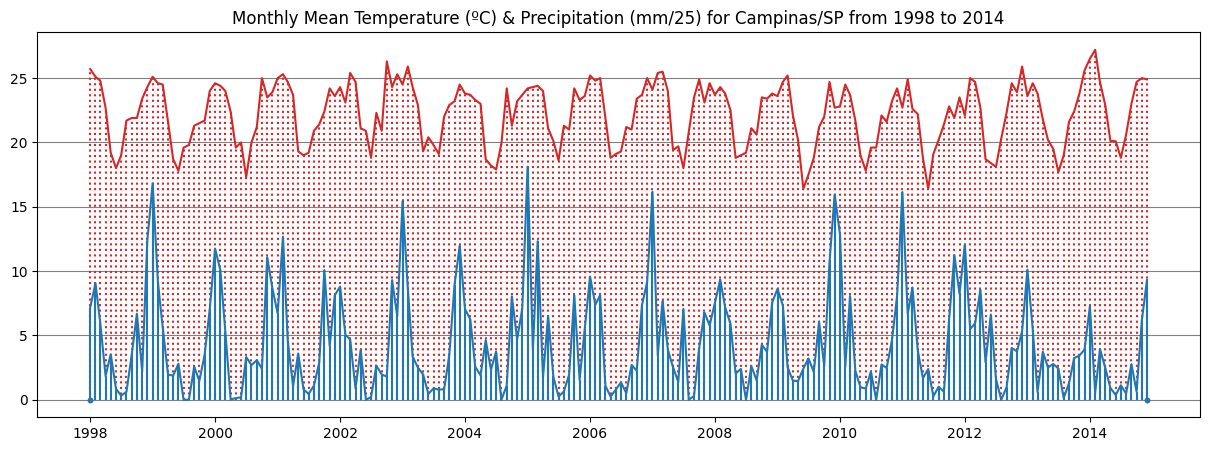

In [24]:
# @title Stem Plot
fig = plt.figure(linewidth=1, figsize=(15, 5))
ax = plt.gca()
ax.stem(df_clean.index, df_clean['MeanTemp'],
                            linefmt  ='C3:',
                            markerfmt='C3-',
                            basefmt  ='C3.')
ax.stem(df_clean.index, df_clean['Rain']/25,
                            linefmt  ='C0-',
                            markerfmt='C0-',
                            basefmt  ='C0.')
plt.grid(axis='y', color='.5')
plt.title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP from 1998 to 2014')
plt.show()

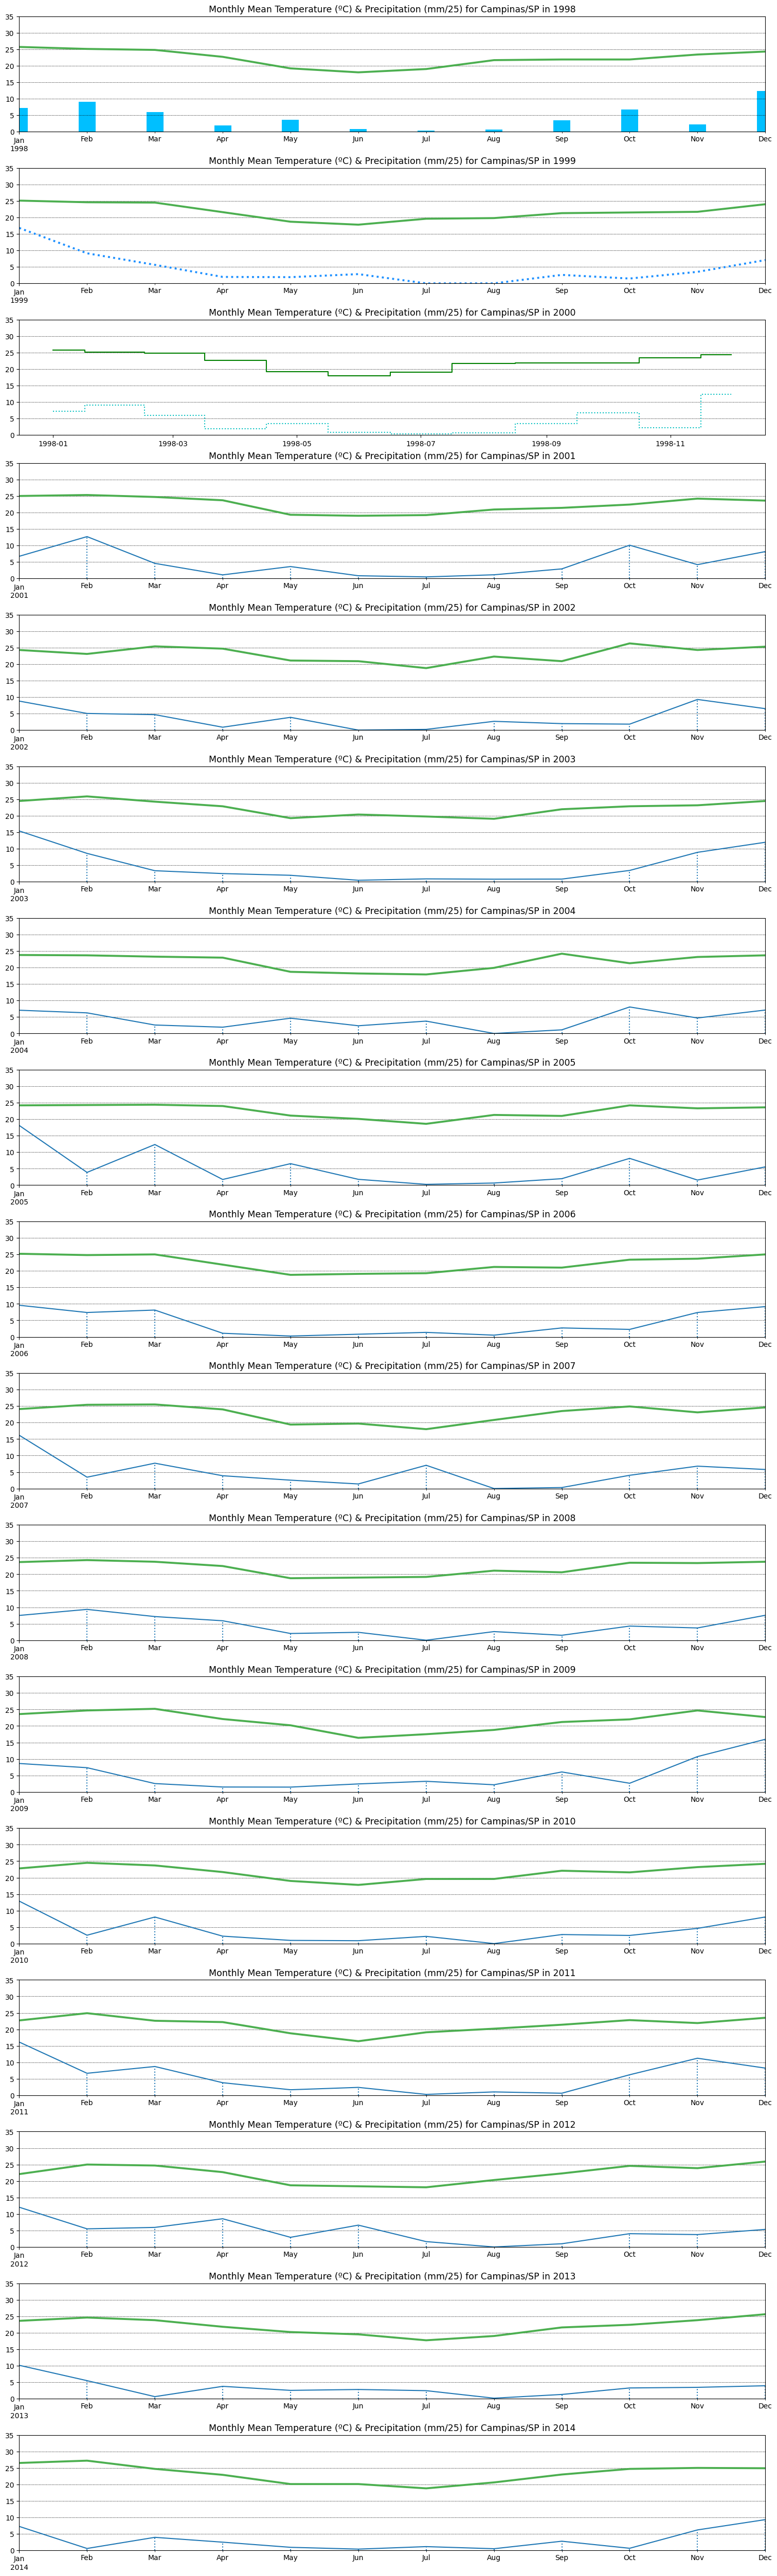

In [25]:
# @title Yearly
# Plotting:
fig, ax = plt.subplots(nrows=17, ncols=1, figsize=(15, 50), constrained_layout=True)
font = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Mean Temperature 1998:
df_clean.loc['1998-01-01':'1998-12-31', 'MeanTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 1998 (Bar):
ax[0].bar(df_clean.index, df_clean.Rain/25,
                            width=.25,
                            linestyle='solid',
                            color='DeepSkyBlue')
ax[0].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 1998',
                            fontdict=font, loc='center')
ax[0].grid(axis='y', ls=':', lw=.75, c='k')
ax[0].set_xlabel(None)
ax[0].set_ylim(0,  35)
# Mean Temperature 1999:
df_clean.loc['1999-01-01':'1999-12-31','MeanTemp'].plot(kind='line', ax=ax[1],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 1999 (Line):
((df_clean.loc['1999-01-01':'1999-12-31', 'Rain'])/25).plot(kind='line', ax=ax[1],
                            linewidth=2.75,
                            linestyle='dotted',
                            color='DodgerBlue')
ax[1].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 1999',
                            fontdict=font, loc='center')
ax[1].grid(axis='y', ls=':', lw=.75, c='k')
ax[1].set_xlabel(None)
ax[1].set_ylim(0,  35)
# Mean Temperature 2000 (Step):
ax[2].plot(df_clean.index[0:12],
        df_clean.loc['1998-01-01':'1998-12-31', 'MeanTemp'],
        'g-', label='MeanTemp', drawstyle='steps-mid')
#df_clean.loc['2000-01-01':'2000-12-31', 'MeanTemp'].plot(kind='line', ax=ax[2],
#                            linewidth=2.75,
#                            linestyle='solid',
#                            color='#4CAF50')
# Rain 2000 (Step):
ax[2].plot(df_clean.index[0:12],
        (df_clean.loc['1998-01-01':'1998-12-31', 'Rain'])/25,
        'c:', label='Rain', drawstyle='steps-mid')
#((df_clean.loc['2000-01-01':'2000-12-31', 'Rain'])/25).plot(kind='line', ax=ax[2],
#                            linewidth=2.75,
#                            linestyle='dotted',
#                            color='DodgerBlue')
ax[2].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2000',
                            fontdict=font, loc='center')
ax[2].grid(axis='y', ls=':', lw=.75, c='k')
ax[2].set_xlabel(None)
ax[2].set_ylim(0,  35)
# Mean Temperature 2001 (Stem):
df_clean.loc['2001-01-01':'2001-12-31', 'MeanTemp'].plot(kind='line', ax=ax[3],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2001 (Stem):
ax[3].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[3].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2001',
                            fontdict=font, loc='center')
ax[3].grid(axis='y', ls=':', lw=.75, c='k')
ax[3].set_xlabel(None)
ax[3].set_ylim(0,  35)
# Mean Temperature 2002 (Stem):
df_clean.loc['2002-01-01':'2002-12-31','MeanTemp'].plot(kind='line', ax=ax[4],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2002 (Stem):
ax[4].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[4].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2002',
                            fontdict=font, loc='center')
ax[4].grid(axis='y', ls=':', lw=.75, c='k')
ax[4].set_xlabel(None)
ax[4].set_ylim(0,  35)
# Mean Temperature 2003 (Stem):
df_clean.loc['2003-01-01':'2003-12-31', 'MeanTemp'].plot(kind='line', ax=ax[5],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2003 (Stem):
ax[5].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[5].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2003',
                            fontdict=font, loc='center')
ax[5].grid(axis='y', ls=':', lw=.75, c='k')
ax[5].set_xlabel(None)
ax[5].set_ylim(0,35)
# Mean Temperature 2004 (Stem):
df_clean.loc['2004-01-01':'2004-12-31', 'MeanTemp'].plot(kind='line', ax=ax[6],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2004 (Stem):
ax[6].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[6].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2004',
                            fontdict=font, loc='center')
ax[6].grid(axis='y', ls=':', lw=.75, c='k')
ax[6].set_xlabel(None)
ax[6].set_ylim(0,  35)
# Mean Temperature 2005 (Stem):
df_clean.loc['2005-01-01':'2005-12-31', 'MeanTemp'].plot(kind='line', ax=ax[7],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2005 (Stem):
ax[7].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[7].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2005',
                            fontdict=font, loc='center')
ax[7].grid(axis='y', ls=':', lw=.75, c='k')
ax[7].set_xlabel(None)
ax[7].set_ylim(0,  35)
# Mean Temperature 2006 (Stem):
df_clean.loc['2006-01-01':'2006-12-31', 'MeanTemp'].plot(kind='line', ax=ax[8],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2006 (Stem):
ax[8].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[8].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2006',
                            fontdict=font, loc='center')
ax[8].grid(axis='y', ls=':', lw=0.75, c='k')
ax[8].set_xlabel(None)
ax[8].set_ylim(0,  35)
# Mean Temperature 2007 (Stem):
df_clean.loc['2007-01-01':'2007-12-31', 'MeanTemp'].plot(kind='line', ax=ax[9],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2007 (Stem):
ax[9].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[9].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2007',
                            fontdict=font, loc='center')
ax[9].grid(axis='y', ls=':', lw=.75, c='k')
ax[9].set_xlabel(None)
ax[9].set_ylim(0,  35)
# Mean Temperature 2008 (Stem):
df_clean.loc['2008-01-01':'2008-12-31', 'MeanTemp'].plot(kind='line', ax=ax[10],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2008 (Stem):
ax[10].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[10].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2008',
                            fontdict=font, loc='center')
ax[10].grid(axis='y', ls=':', lw=0.75, c='k')
ax[10].set_xlabel(None)
ax[10].set_ylim(0,  35)
# Mean Temperature 2009 (Stem):
df_clean.loc['2009-01-01':'2009-12-31', 'MeanTemp'].plot(kind='line', ax=ax[11],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2009 (Stem):
ax[11].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[11].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2009',
                            fontdict=font, loc="center")
ax[11].grid(axis='y', ls=':', lw=.75, c='k')
ax[11].set_xlabel(None)
ax[11].set_ylim(0,  35)
# Mean Temperature 2010 (Stem):
df_clean.loc['2010-01-01':'2010-12-31', 'MeanTemp'].plot(kind='line', ax=ax[12],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2010 (Stem):
ax[12].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[12].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2010',
                            fontdict=font, loc='center')
ax[12].grid(axis='y', ls=':', lw=.75, c='k')
ax[12].set_xlabel(None)
ax[12].set_ylim(0,35)
# Mean Temperature 2011 (Stem):
df_clean.loc['2011-01-01':'2011-12-31', 'MeanTemp'].plot(kind='line', ax=ax[13],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2011 (Stem):
ax[13].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[13].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2011',
                            fontdict=font, loc='center')
ax[13].grid(axis='y', ls=':', lw=.75, c='k')
ax[13].set_xlabel(None)
ax[13].set_ylim(0,35)
# Mean Temperature 2012 (Stem):
df_clean.loc['2012-01-01':'2012-12-31', 'MeanTemp'].plot(kind='line', ax=ax[14],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2012 (Stem):
ax[14].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[14].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2012',
                            fontdict=font, loc='center')
ax[14].grid(axis='y', ls=':', lw=.75, c='k')
ax[14].set_xlabel(None)
ax[14].set_ylim(0,  35)
# Mean Temperature 2013 (Stem):
df_clean.loc['2013-01-01':'2013-12-31','MeanTemp'].plot(kind='line', ax=ax[15],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2013 (Stem):
ax[15].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[15].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2013',
                            fontdict=font, loc='center')
ax[15].grid(axis='y', ls=':', lw=.75, c='k')
ax[15].set_xlabel(None)
ax[15].set_ylim(0,  35)
# Mean Temperature 2014 (Stem):
df_clean.loc['2014-01-01':'2014-12-31', 'MeanTemp'].plot(kind='line', ax=ax[16],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2014 (Stem):
ax[16].stem(df_clean.index, df_clean.Rain/25,
                            linefmt  ='C0:',
                            markerfmt='C0-',
                            basefmt  ='C0.')
ax[16].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2014',
                            fontdict=font, loc='center')
ax[16].grid(axis='y', ls=':', lw=.75, c='k')
ax[16].set_xlabel(None)
ax[16].set_ylim(0,  35)
plt.show()

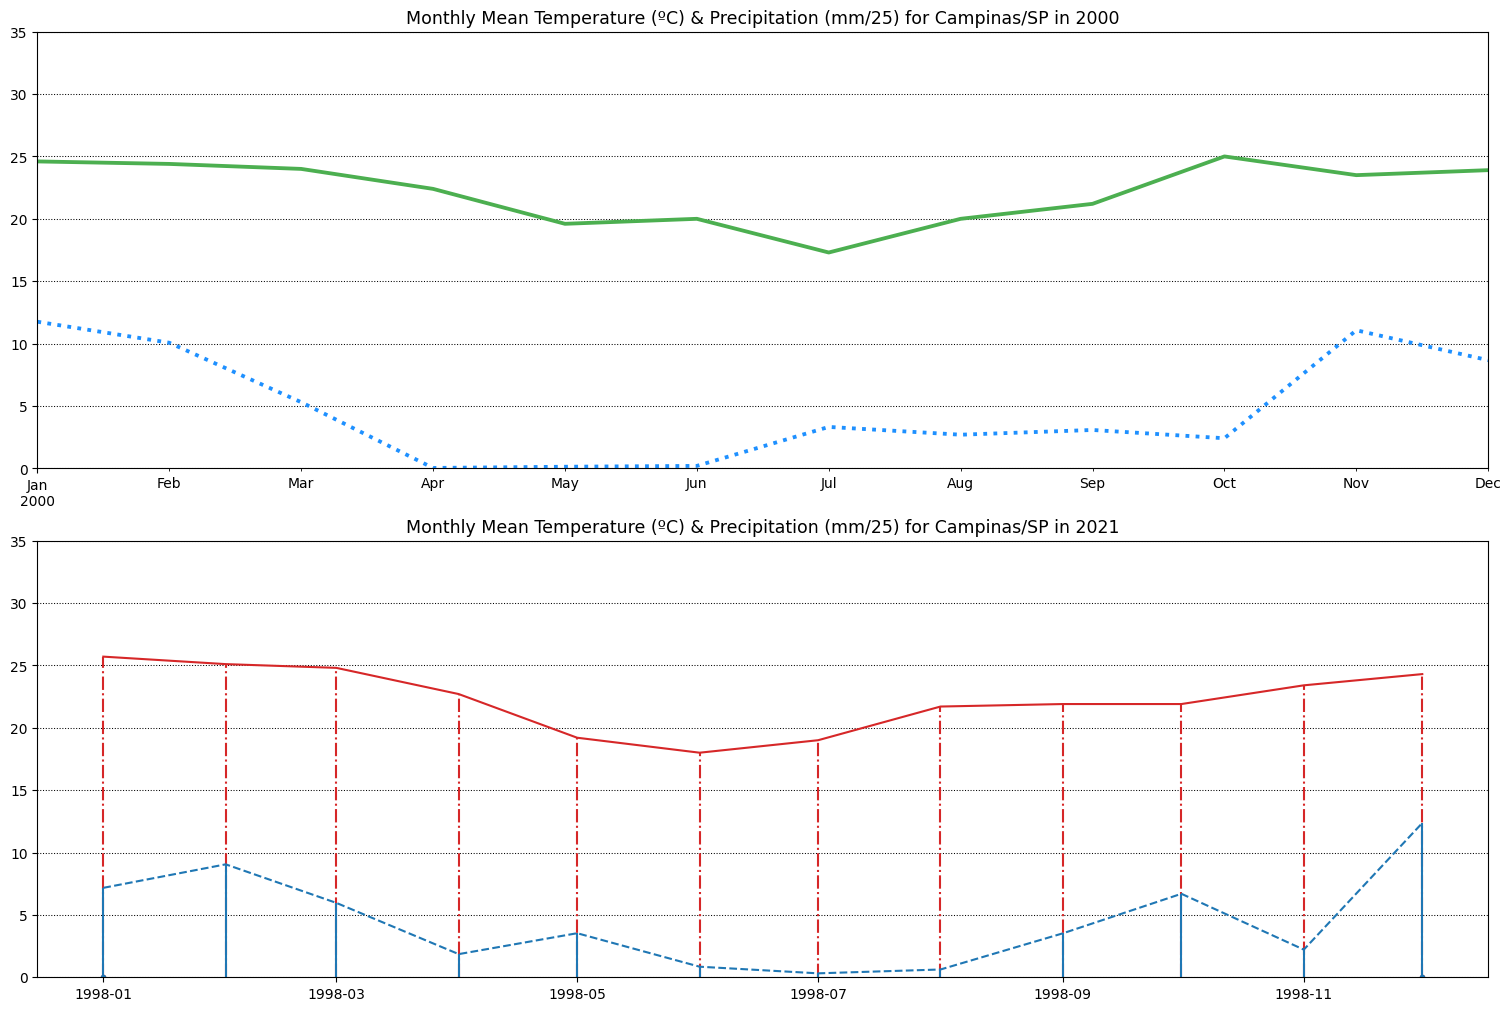

In [26]:
# @title Yearly
# Plotting:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), constrained_layout=True)
font = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Mean Temperature 2000:
df_clean.loc['2000-01-01':'2000-12-31','MeanTemp'].plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Rain 2000:
((df_clean.loc['2000-01-01':'2000-12-31','Rain'])/25).plot(kind='line', ax=ax[0],
                            linewidth=2.75,
                            linestyle='dotted',
                            color='DodgerBlue')
ax[0].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2000',
                            fontdict=font, loc='center')
ax[0].grid(axis='y', ls=':', lw=.75, c='k')
ax[0].set_xlabel(None)
ax[0].set_ylim(0,35)
# Mean Temperature 2001:
ax[1].stem(df_clean.index[0:12],
        df_clean.loc['1998-01-01':'1998-12-31', 'MeanTemp'],
                            linefmt  ='C3-.',
                            markerfmt='C3-' ,
                            basefmt  ='C3.' )
# Rain 2001:
ax[1].stem(df_clean.index[0:12], (df_clean.loc['1998-01-01':'1998-12-31', 'Rain'])/25,
                            linefmt  ='C0-' ,
                            markerfmt='C0--',
                            basefmt  ='C0.' )
ax[1].set_title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 2021',
                            fontdict=font, loc='center')
ax[1].grid(axis='y', ls=':', lw=.75, c='k')
ax[1].set_xlabel(None)
ax[1].set_ylim(0,  35)
plt.show()

In [27]:
df_clean

Cases   Rain  MeanTemp  MinTemp  MaxTemp
data                                                
1998-01-01    237  179.2      25.7     20.2     28.1
1998-02-01    331  226.3      25.1     20.0     28.0
1998-03-01    562  149.1      24.8     22.4     27.2
1998-04-01    187   46.4      22.7     18.1     26.0
1998-05-01     32   88.3      19.2     15.7     22.9
...           ...    ...       ...      ...      ...
2014-08-01     55   12.2      20.6     13.1     24.7
2014-09-01     40   69.2      23.0     18.6     26.8
2014-10-01     40   15.6      24.7     17.2     30.0
2014-11-01     57  154.8      25.0     22.1     28.3
2014-12-01     37  232.8      24.9     21.3     27.8

[204 rows x 5 columns]

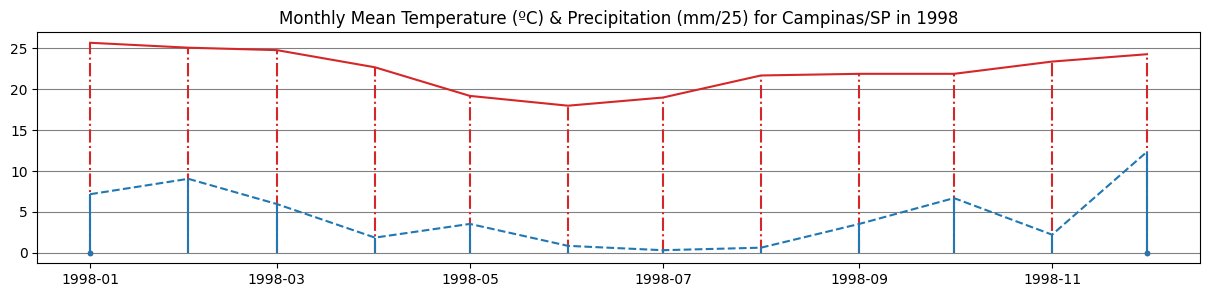

In [28]:
# @title Stem Plot
fig = plt.figure(linewidth=1, figsize=(15, 3))
ax = plt.gca()
ax.stem(df_clean.index[0:12],
        df_clean.loc['1998-01-01':'1998-12-31', 'MeanTemp'],
                            linefmt  ='C3-.',
                            markerfmt='C3-' ,
                            basefmt  ='C3.' )
ax.stem(df_clean.index[0:12], (df_clean.loc['1998-01-01':'1998-12-31', 'Rain'])/25,
                            linefmt  ='C0-' ,
                            markerfmt='C0--',
                            basefmt  ='C0.' )
plt.grid(axis='y', color='.5')
plt.title('Monthly Mean Temperature (ºC) & Precipitation (mm/25) for Campinas/SP in 1998')
plt.show()

In [29]:
((df_clean.loc['1998-01-01':'1998-12-31', 'Rain'])/25)

data
1998-01-01     7.168
1998-02-01     9.052
1998-03-01     5.964
1998-04-01     1.856
1998-05-01     3.532
1998-06-01     0.848
1998-07-01     0.316
1998-08-01     0.624
1998-09-01     3.524
1998-10-01     6.692
1998-11-01     2.216
1998-12-01    12.364
Name: Rain, dtype: float64

In [30]:
df_clean.loc['1998-01-01':'1998-12-31','MeanTemp']

data
1998-01-01    25.7
1998-02-01    25.1
1998-03-01    24.8
1998-04-01    22.7
1998-05-01    19.2
1998-06-01    18.0
1998-07-01    19.0
1998-08-01    21.7
1998-09-01    21.9
1998-10-01    21.9
1998-11-01    23.4
1998-12-01    24.3
Name: MeanTemp, dtype: float64

**Temperature & Precipitation Correlation**

As it can be clearly seen in the chart, there is a somewhat correlation between temperature and precipitation, but the correlation is only about 50**%**. High temperatures do not automatically translate to more rain, as it can be observed in places with severe drought.

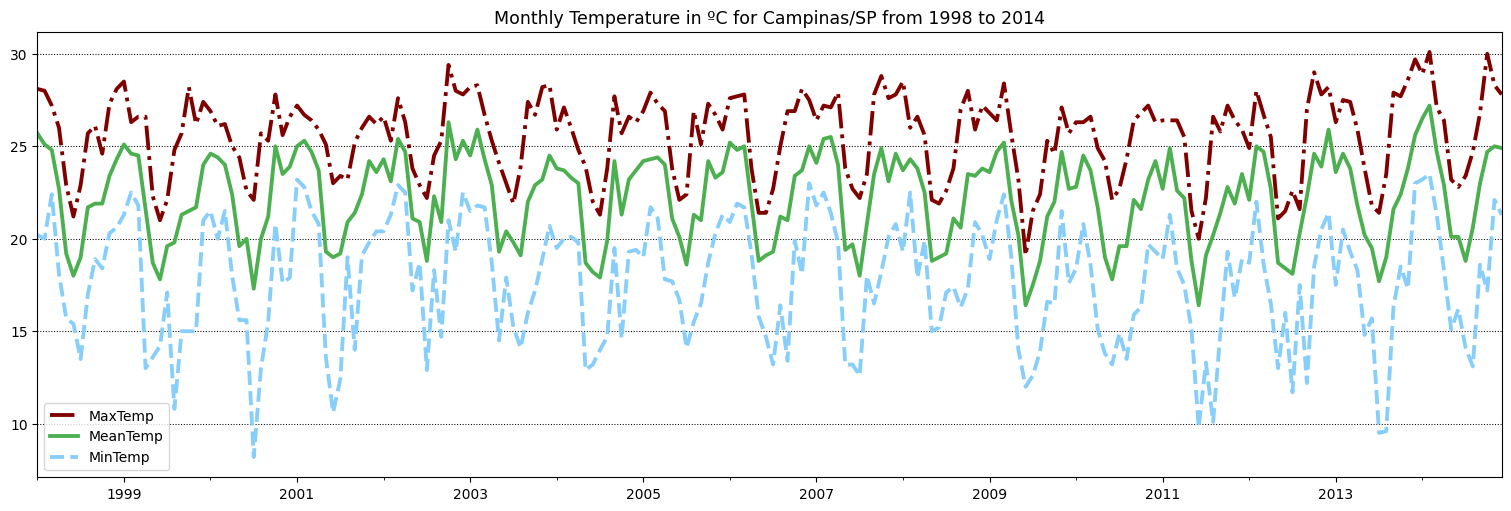

In [31]:
# Analysing just the Temperatures:
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
# Maximum Temperature:
df_clean['MaxTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dashdot',
                            color='maroon')
# Mean Temperature:
df_clean['MeanTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='solid',
                            color='#4CAF50')
# Minimum Temperature:
df_clean['MinTemp'].plot(kind='line', ax=ax,
                            linewidth=2.75,
                            linestyle='dashed',
                            color='LightSkyBlue')
ax.set_title('Monthly Temperature in ºC for Campinas/SP from 1998 to 2014',
                            fontdict=font, loc="center")
ax.set_xlabel(None)
plt.grid(axis='y', ls=':', lw=.75, c='k')
#plt.ylim(0, 35)
plt.legend()
plt.show()

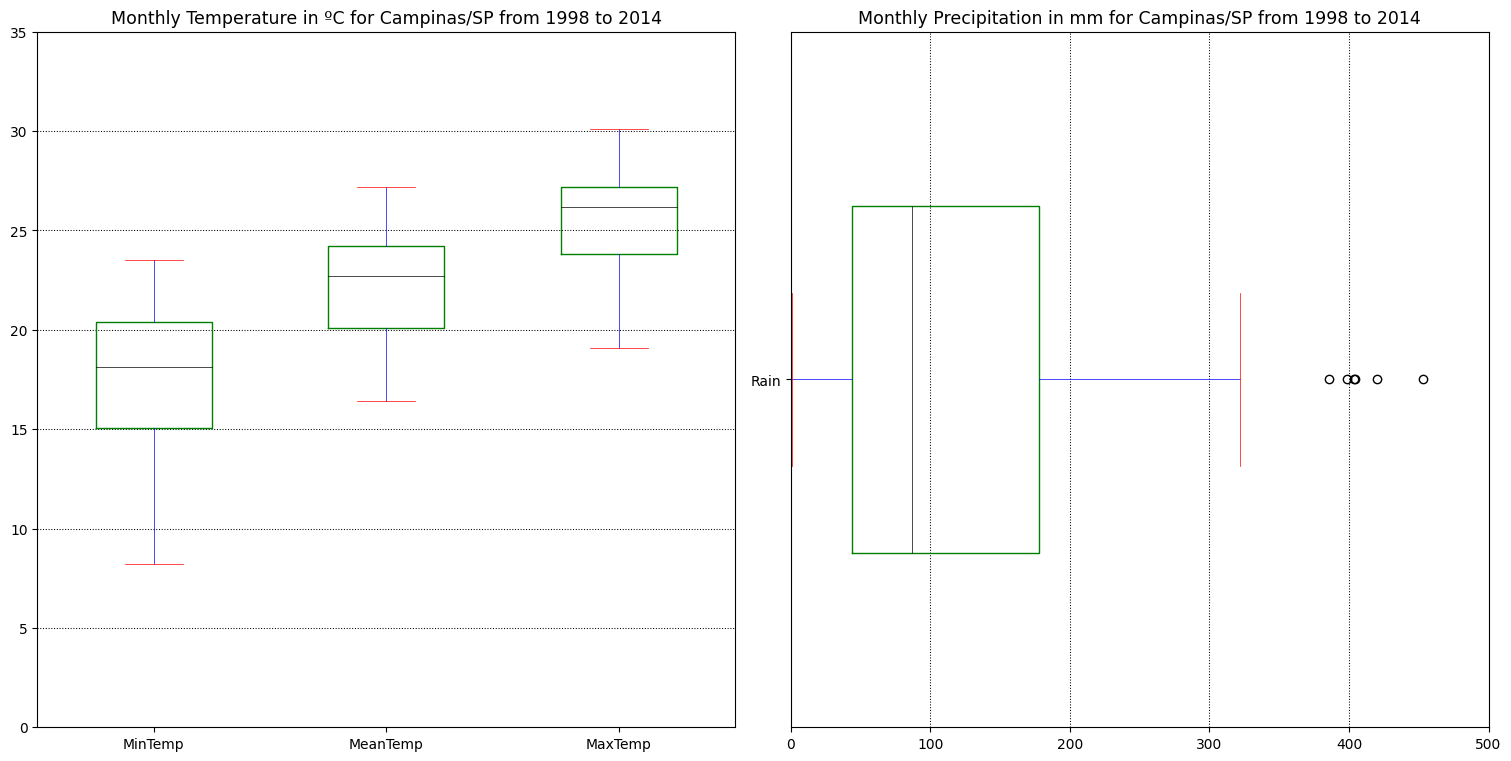

In [32]:
# @title BoxPlot
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5), constrained_layout=True)
font   = {'family':'sans-serif', 'color':'black', 'size':12.5}
df.boxplot(['MinTemp', 'MeanTemp', 'MaxTemp'],
           ax=ax[0],
           rot=0,
           color='g',
           vert=True,
           grid=False,
           widths=0.5,
           fontsize=10,
           figsize=(20, 10),
           showmeans=False,
           showfliers=True,
           medianprops= {'color':'k', 'linewidth':.5},
           whiskerprops={'color':'b', 'linewidth':.5},
           capprops=    {'color':'r', 'linewidth':.5})
ax[0].set_title('Monthly Temperature in ºC for Campinas/SP from 1998 to 2014',
            fontdict=font,  loc= 'center')
ax[0].grid(axis='y', ls=':', lw=.75, c='k')
ax[0].set_ylim(0, 35)
df.boxplot(['Rain'],
           ax=ax[1],
           rot=0,
           color='g',
           vert=False,
           grid=False,
           widths=.5,
           fontsize=10,
           figsize=(20, 10),
           showmeans=False,
           showfliers=True,
           medianprops= {'color':'k', 'linewidth':.5},
           whiskerprops={'color':'b', 'linewidth':.5},
           capprops=    {'color':'r', 'linewidth':.5})
ax[1].set_title('Monthly Precipitation in mm for Campinas/SP from 1998 to 2014',
            fontdict=font,  loc='center')
ax[1].grid(axis='x', ls=':', lw=.75, c='k')
ax[1].set_xlim(0, 500)
plt.show()

In [33]:
# @title OutLiers
# Identifying OutLiers in Rain:
Q1 = df_clean.Rain.quantile(.25)
Q3 = df_clean.Rain.quantile(.75)
IQR = Q3 - Q1
print('         IQR for Rain:  {:.2f}'.format(IQR))
# Calculating the Higher Limit:
HL = Q3 + 1.5 * IQR
print('Higher Limit for Rain:  {:.2f}'.format(HL),'\n\n',
    (df_clean.loc[df_clean['Rain'] > HL])
    .sort_values(by='Rain', ascending=False),'\n\n',
    'The DataSet has {} entrances,'
    .format(df_clean.shape[0]),'\n',
    'of which {} are above the higher limit of {:.2f}mm,'
    .format(len(df_clean[df_clean.Rain > HL]), HL),'\n',
    'representing {:.2f}% of the ocurrencies.'
    .format((len(df_clean[df_clean.Rain > HL])/df.shape[0])*100))

         IQR for Rain:  139.45
Higher Limit for Rain:  385.60 

             Cases   Rain  MeanTemp  MinTemp  MaxTemp
data                                                
2005-01-01      5  452.8      24.2     19.0     26.9
1999-01-01      7  420.3      25.1     21.3     28.5
2007-01-01    169  404.1      24.1     21.8     26.4
2011-01-01     68  403.6      22.7     18.9     26.4
2009-12-01      7  398.8      22.7     17.6     25.7 

 The DataSet has 204 entrances, 
 of which 5 are above the higher limit of 385.60mm, 
 representing 2.45% of the ocurrencies.


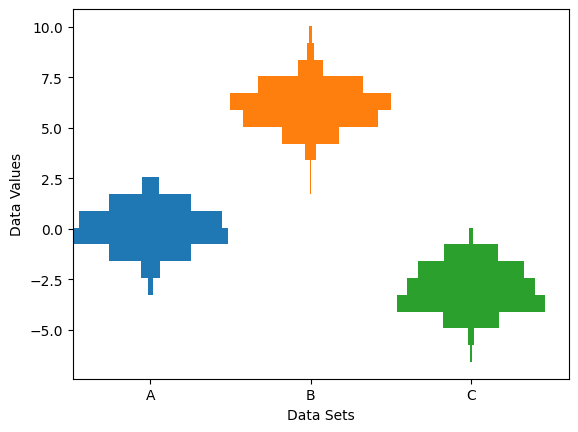

In [34]:
np.random.seed(19680801)
number_of_bins = 20
# An example of three data sets to compare
number_of_data_points = 387
labels = ['A', 'B', 'C']
data_sets = [np.random.normal(0, 1, number_of_data_points),
             np.random.normal(6, 1, number_of_data_points),
             np.random.normal(-3, 1, number_of_data_points)]
# Computed quantities to aid plotting:
hist_range = (np.min(data_sets), np.max(data_sets))
binned_data_sets = [
    np.histogram(d, range=hist_range, bins=number_of_bins)[0]
    for d in data_sets]
binned_maximums = np.max(binned_data_sets, axis=1)
x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))
# The bin_edges are the same for all of the histograms:
bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
heights = np.diff(bin_edges)
centers = bin_edges[:-1] + heights / 2
# Cycle through and plot each histogram:
fig, ax = plt.subplots()
for x_loc, binned_data in zip(x_locations, binned_data_sets):
    lefts = x_loc - 0.5 * binned_data
    ax.barh(centers, binned_data, height=heights, left=lefts)
ax.set_xticks(x_locations, labels)
ax.set_ylabel('Data Values')
ax.set_xlabel('Data Sets')
plt.show()

In [35]:
# @title Correlation Matrix
corr = df_clean[['MaxTemp',
                 'MeanTemp',
                 'MinTemp',
                 'Rain']].corr();
display(corr)

MaxTemp  MeanTemp   MinTemp      Rain
MaxTemp   1.000000  0.893091  0.685034  0.422120
MeanTemp  0.893091  1.000000  0.885326  0.513437
MinTemp   0.685034  0.885326  1.000000  0.490937
Rain      0.422120  0.513437  0.490937  1.000000

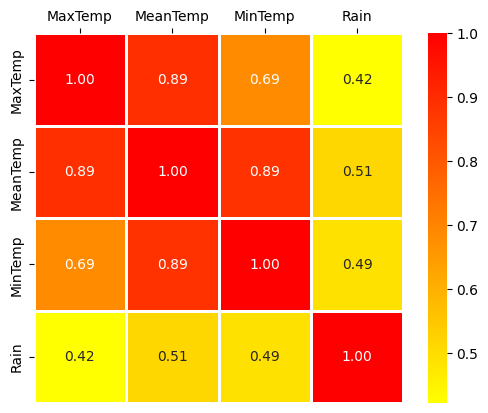

<Figure size 1500x1500 with 0 Axes>

In [36]:
# @title HeatMap
sns.set_style()
ax = sns.heatmap(corr,
                 fmt='.2f',
                 cbar=True,
                 annot=True,
                 square=True,
                 cmap='autumn_r',
                 linewidths=1,
                 linecolor='white')
ax.xaxis.tick_top()
plt.figure(figsize=(15,15), constrained_layout=True).show();

Correlações…

In [37]:
# @title Profiling Report
# Instalando e importanto recursos necessários:
#%pip install --upgrade pip    -q
%pip install --upgrade ydata-profiling -q
#%pip install --upgrade pillow -q
from ydata_profiling import ProfileReport
# Criando ProfileReport:
profile = ProfileReport(df_clean,
                       title='Monthly Temperature (ºC) & Precipitation (mm) for Campinas/SP from 1998 to 2014',
                       explorative=True)
# Exportando HTML:
profile.to_file('CampinasProFile.html')
# Visualização:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# @title SweetViz
%pip install sweetviz -q
import numpy  as np
import pandas as pd
import sweetviz

In [39]:
report = sweetviz.analyze(df_clean)
report.show_html('CampinasSweetViz.html')
chuva  = sweetviz.analyze(df_clean, 'Rain')
chuva.show_html('Rain.html')

                                             |          | [  0%]   00:00 -> (? left)

Report CampinasSweetViz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

Report Rain.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
